# Introdução

Atividade produzida para a disciplina EBM116 – Tópicos Avançados em Imagens Médicas do programa de pós-graduação em Engenharia Biomédica da Universidade Federal do ABC (UFABC). O objetivo da atividade foi importar e explorar uma imagem de formato DICOM.

<i><b>Autor</b>: Leonardo Alves Ferreira</i> 

# Sumário
1. [Importar a imagem](#Importar)
2. [Visualização da imagem](#Visualizar)
3. [Cálculo do desvio padrão](#Desvio)

# Importar a imagem <a name="Importar"></a>

Para a realização desta atividade, foi escolhida uma imagem de ressonância magnética da cabeça de uma pessoa, obtida do <a href="https://www.cancerimagingarchive.net">Cancer Image Archive</a>.

O primeiro passo realizado foi importar a imagem utilizando a biblioteca Pydicom.

In [1]:
import pydicom as pdc

path="Brain_MRI/1-13.dcm"
Im=pdc.dcmread(path)

Com a imagem importada, as tags do seu cabeçalho podem ser lidas utilizando a função print():

In [2]:
print(Im)

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'OTHER']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.4429.7055.133816118692764248330649414973
(0008, 0020) Study Date                          DA: '20011008'
(0008, 0021) Series Date                         DA: '20011008'
(0008, 0022) Acquisition Date                    DA: '20011008'
(0008, 0023) Content Date                        DA: '20011008'
(0008, 0030) Study Time                          TM: '142106'
(0008, 0031) Series Time                         TM: '152150'
(0008, 0032) Acquisition Time                    TM: '152150'
(0008, 0033) Content Time                        TM: '152150'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'MR'
(0008, 0070) Manufacturer                 

Essas tags permitem obter uma série de informações sobre a imagem, que vão desde as características do paciente até os parâmetros utilizados no equipamento para a aquisição. Maiores informações sobre o significado de cada uma dessas tags podem ser encontradas <a href="https://dicom.innolitics.com/ciods">neste site</a>.

Essas mesmas informações podem ser obtidas acessando atributos da instância gerada para a imagem. Para acessar os nomes dos atributos existentes, a função dir() pode ser utilizada:

In [3]:
dir(Im)

['AccessionNumber',
 'AcquisitionDate',
 'AcquisitionMatrix',
 'AcquisitionNumber',
 'AcquisitionTime',
 'AdditionalPatientHistory',
 'AngioFlag',
 'BitsAllocated',
 'BitsStored',
 'BodyPartExamined',
 'CardiacNumberOfImages',
 'Columns',
 'ContentDate',
 'ContentTime',
 'ContrastBolusAgent',
 'ContrastBolusRoute',
 'DeidentificationMethod',
 'DeidentificationMethodCodeSequence',
 'DeviceSerialNumber',
 'EchoNumbers',
 'EchoTime',
 'EchoTrainLength',
 'FlipAngle',
 'FrameOfReferenceUID',
 'HeartRate',
 'HighBit',
 'ImageOrientationPatient',
 'ImagePositionPatient',
 'ImageType',
 'ImagedNucleus',
 'ImagesInAcquisition',
 'ImagingFrequency',
 'InPlanePhaseEncodingDirection',
 'InstanceNumber',
 'InterpretationStatusID',
 'InversionTime',
 'LargestImagePixelValue',
 'Laterality',
 'LongitudinalTemporalInformationModified',
 'MRAcquisitionType',
 'MagneticFieldStrength',
 'Manufacturer',
 'ManufacturerModelName',
 'Modality',
 'NumberOfAverages',
 'PatientAge',
 'PatientBirthDate',
 'Pati

Algumas das principais informações contidas nessa imagem são apresentadas abaixo.

In [17]:
print("INFORMAÇÕES DO PACIENTE")
print("Nome do paciente: {} (omitido para confidencialidade)".format(Im.PatientName))
print("Sexo: {} (Masculino)".format(Im.PatientSex))
print("Idade: {}".format(Im.PatientAge))
print("Peso: {} kg".format(Im.PatientWeight))

INFORMAÇÕES DO PACIENTE
Nome do paciente: QIN-BRAIN-DSC-01-01 (omitido para confidencialidade)
Sexo: M (Masculino)
Idade: 069Y
Peso: 83.007 kg


In [5]:
print("INFORMAÇÕES DO EQUIPAMENTO")
print("Fabricante: {}".format(Im.Manufacturer))
print("Modelo: {}".format(Im.ManufacturerModelName))
print("Força do campo magnético: {}T".format(Im.MagneticFieldStrength))

INFORMAÇÕES DO EQUIPAMENTO
Fabricante: GE MEDICAL SYSTEMS
Modelo: SIGNA EXCITE
Força do campo magnético: 1.5T


In [6]:
print("INFORMAÇÕES DA AQUISIÇÃO")
print("Tipo de aquisição: {}".format(Im.MRAcquisitionType))
print("Contraste utilizado: {}".format(Im.ContrastBolusAgent))
print("Tipo de sequência: {}".format(Im.ScanningSequence))
print("Tempo de eco: {}".format(Im.EchoTime))
print("Tempo de repetição: {}".format(Im.RepetitionTime))
print("Posição do paciente: {} (Head First-Supine)".format(Im.PatientPosition))
print("Parte do corpo examinada: {}".format(Im.BodyPartExamined))

INFORMAÇÕES DA AQUISIÇÃO
Tipo de aquisição: 2D
Contraste utilizado: 9cc   multihance
Tipo de sequência: SE
Tempo de eco: 20
Tempo de repetição: 666.664
Posição do paciente: HFS (Head First-Supine)
Parte do corpo examinada: BRAIN


In [7]:
print("INFORMAÇÕES DA IMAGEM")
print("Número de imagens adquiridas: {}".format(Im.ImagesInAcquisition))
print("Espessura da fatia: {} mm".format(Im.SliceThickness))
print("Espaçamento entre fatia: {} mm".format(Im.SpacingBetweenSlices))
print("Número de linhas: {}".format(Im.Rows))
print("Número de colunas: {}".format(Im.Columns))
print("Espaçamento dos pixels: {} mm".format(Im.PixelSpacing))
print("Maior valor de pixel: {}".format(Im.LargestImagePixelValue))
print("Menor valor de pixel: {}".format(Im.SmallestImagePixelValue))

INFORMAÇÕES DA IMAGEM
Número de imagens adquiridas: 23
Espessura da fatia: 5 mm
Espaçamento entre fatia: 6.5 mm
Número de linhas: 512
Número de colunas: 512
Espaçamento dos pixels: ['0.4297', '0.4297'] mm
Maior valor de pixel: 340
Menor valor de pixel: 0


# Visualização da Imagem  <a name="Visualizar"></a>

Os valores dos pixels da imagem podem ser acessados pelo atributo "pixel_array".

In [8]:
print("Número de pixels: {}".format(Im.pixel_array.size))

Número de pixels: 262144


Esse número pode ser checado lembrando das informações do cabeçalho de que cada imagem possui 512 colunas e 512 linhas. Com isso, temos um total de pixels igual a

In [9]:
print("Número de pixels segundo o cabeçalho: {}".format(512*512))

Número de pixels segundo o cabeçalho: 262144


Como pode-se ver, os números são coerentes (alternativamente, as dimensões do array da imagem poderiam ser checadas por meio do atributo "shape" ao invés do "size").

Para visualizar a imagem, a biblioteca Matplotlib pode ser utilizada.

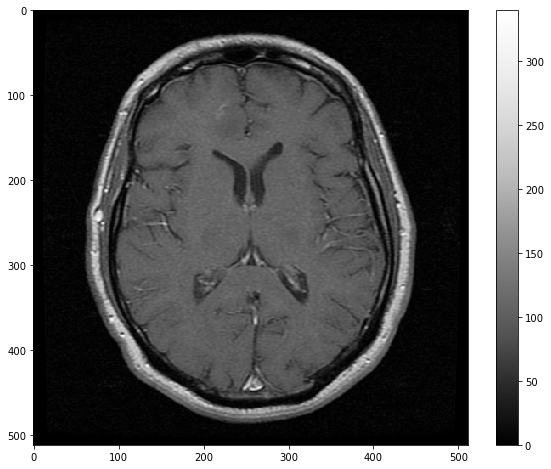

In [14]:
import matplotlib.pyplot as plt

color_map="Greys_r" # Mapa de cores em preto e branco
plt.rcParams['figure.figsize'] = [10, 8] # Ajustar o tamanho da figura

plt.imshow(Im.pixel_array,cmap=color_map)
plt.colorbar()

Alternativamente, o histograma dessa imagem também pode ser visualizado.

(array([1.30479e+05, 1.50230e+04, 5.63880e+04, 4.78100e+04, 4.53000e+03,
        4.42400e+03, 3.09500e+03, 3.16000e+02, 6.40000e+01, 1.50000e+01]),
 array([  0.,  34.,  68., 102., 136., 170., 204., 238., 272., 306., 340.]),
 <a list of 10 Patch objects>)

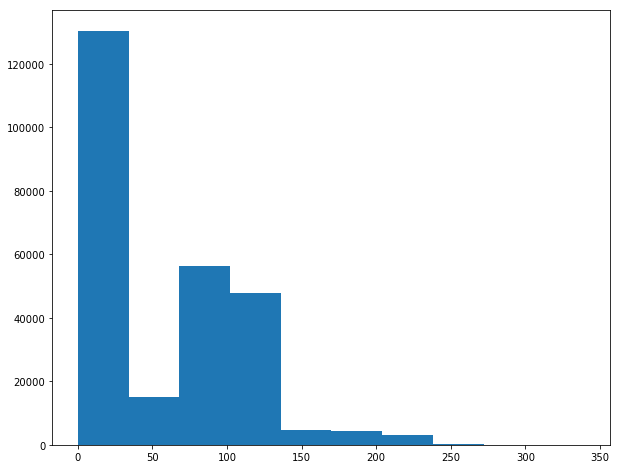

In [15]:
n_bins=10 # Número de divisões do intervalo 
plt.hist(Im.pixel_array.flatten(),n_bins)

# Cálculo do desvio padrão  <a name="Desvio"></a>

Para visualizar uma região da imagem de forma amplificada, algumas ferramentas que são instaladas em conjunto com o Matplotlib podem ser utilizadas:

(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x222ade66e48>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x222ade715f8>)

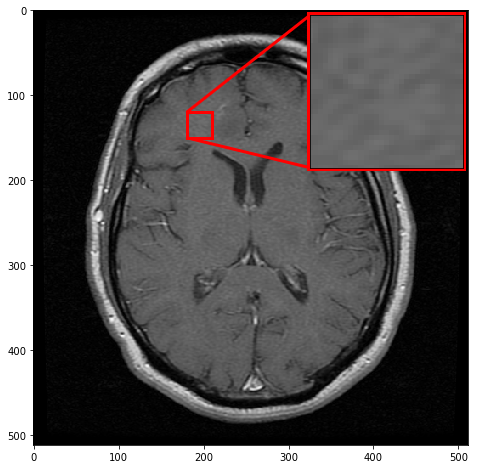

In [16]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes # Criar região ampliada
from mpl_toolkits.axes_grid1.inset_locator import mark_inset # Marcar e ligar a região ampliada com a região na imagem original

# Coordenadas da região amplificada
coord_x=[180,210]
coord_y=[120,150]

# Plotar imagem original
fig, ax = plt.subplots()
ax.imshow(Im.pixel_array,cmap=color_map)

# Criar região para o plot da área ampliada
n_zoom=6 # Fator de ampliação da imagem
pos=1 # Índice para indicar a posição onde a área vai ser exibida
axins = zoomed_inset_axes(ax,n_zoom,loc=pos) 
axins.imshow(Im.pixel_array,cmap=color_map)

# Definir a área parte da imagem que será ampliada
axins.set_xlim(coord_x[0],coord_x[1])
axins.set_ylim(coord_y[0],coord_y[1])

# Arrumar a aparência
axins.patch.set_edgecolor('red') # Cor da borda
axins.patch.set_linewidth('6') # Grossura da borda
plt.tick_params(
        which='both',      
        bottom=False,     
        top=False,         
        left=False,
        right=False,
        labelleft=False,
        labelbottom=False) # Remover os ticks e números dos eixos da região ampliada

# Criar linhas ligando a área ampliada com a área correspondente na figura original
pos_ind=[2,3] # Índices que indicam de quais cantos da região as linhas vão ser traçadas
gross=3 # Grossura das linhas
mark_inset(ax, axins, loc1=pos_ind[0], loc2=pos_ind[1], lw=gross, ec="red")

O desvio padrão, bem como outras informações dessa região, podem ser calculados utilizando a biblioteca Numpy.

In [13]:
import numpy as np

regiao=Im.pixel_array[coord_x[0]:coord_x[1],coord_y[0]:coord_y[1]]
media=np.mean(regiao)
desvio=np.std(regiao)
maximo=np.max(regiao)
minimo=np.min(regiao)

print("Média: {0:.4}\nDesvio Padrão: {1:.4}\nValor máximo: {2}\nValor mínimo: {3}".format(media,desvio,maximo,minimo))

Média: 86.45
Desvio Padrão: 21.16
Valor máximo: 196
Valor mínimo: 30
